## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [53]:
# your code here
data = pd.read_csv('german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [16]:
# your code here
data.isnull().sum().sum()
#Количественные - duration, amount, age
#Бинарные - people_liable, telephone, foreign_worker
#Порядковые - status, savings, employment_duration, present_residence, number_credits, job
#Категориальные - credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, installment_rate

0

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
# your code here
print(data.groupby('purpose').mean()[['amount']])

                          amount
purpose                         
business             8209.333333
car (new)            5370.223301
car (used)           3066.983425
domestic appliances  2728.090909
furniture/equipment  2487.685714
others               3062.948718
radio/television     1498.000000
repairs              3180.400000
retraining           4158.041237
vacation             1205.888889


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
# your code here
print('Процент людей моложе 30, которые снимают жильё:',data.loc[(data['age'] < 30) & (data['housing'] == 'rent')].count()[1]/data['age'].count())
print("Процент людей старше 40, которые снимают жильё:",data.loc[(data['age'] > 40) & (data['housing'] == 'rent')].count()[1]/data['age'].count())

Процент людей моложе 30, которые снимают жильё: 0.246
Процент людей старше 40, которые снимают жильё: 0.185


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
# your code here
data.loc[(data['foreign_worker'] == 'yes') & (~data['number_credits'].isin(['1','1-2','2-3']))].count()[1]

1

### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

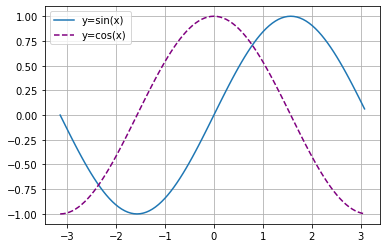

In [8]:
# your code here
x = np.arange(-np.pi,np.pi,0.02*np.pi)
xz = np.sin(x)
fig = plt.figure()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.grid()
plt.plot(x,xz)
xz1 = np.cos(x)
plt.plot(x,xz1,'--', color = 'purple')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

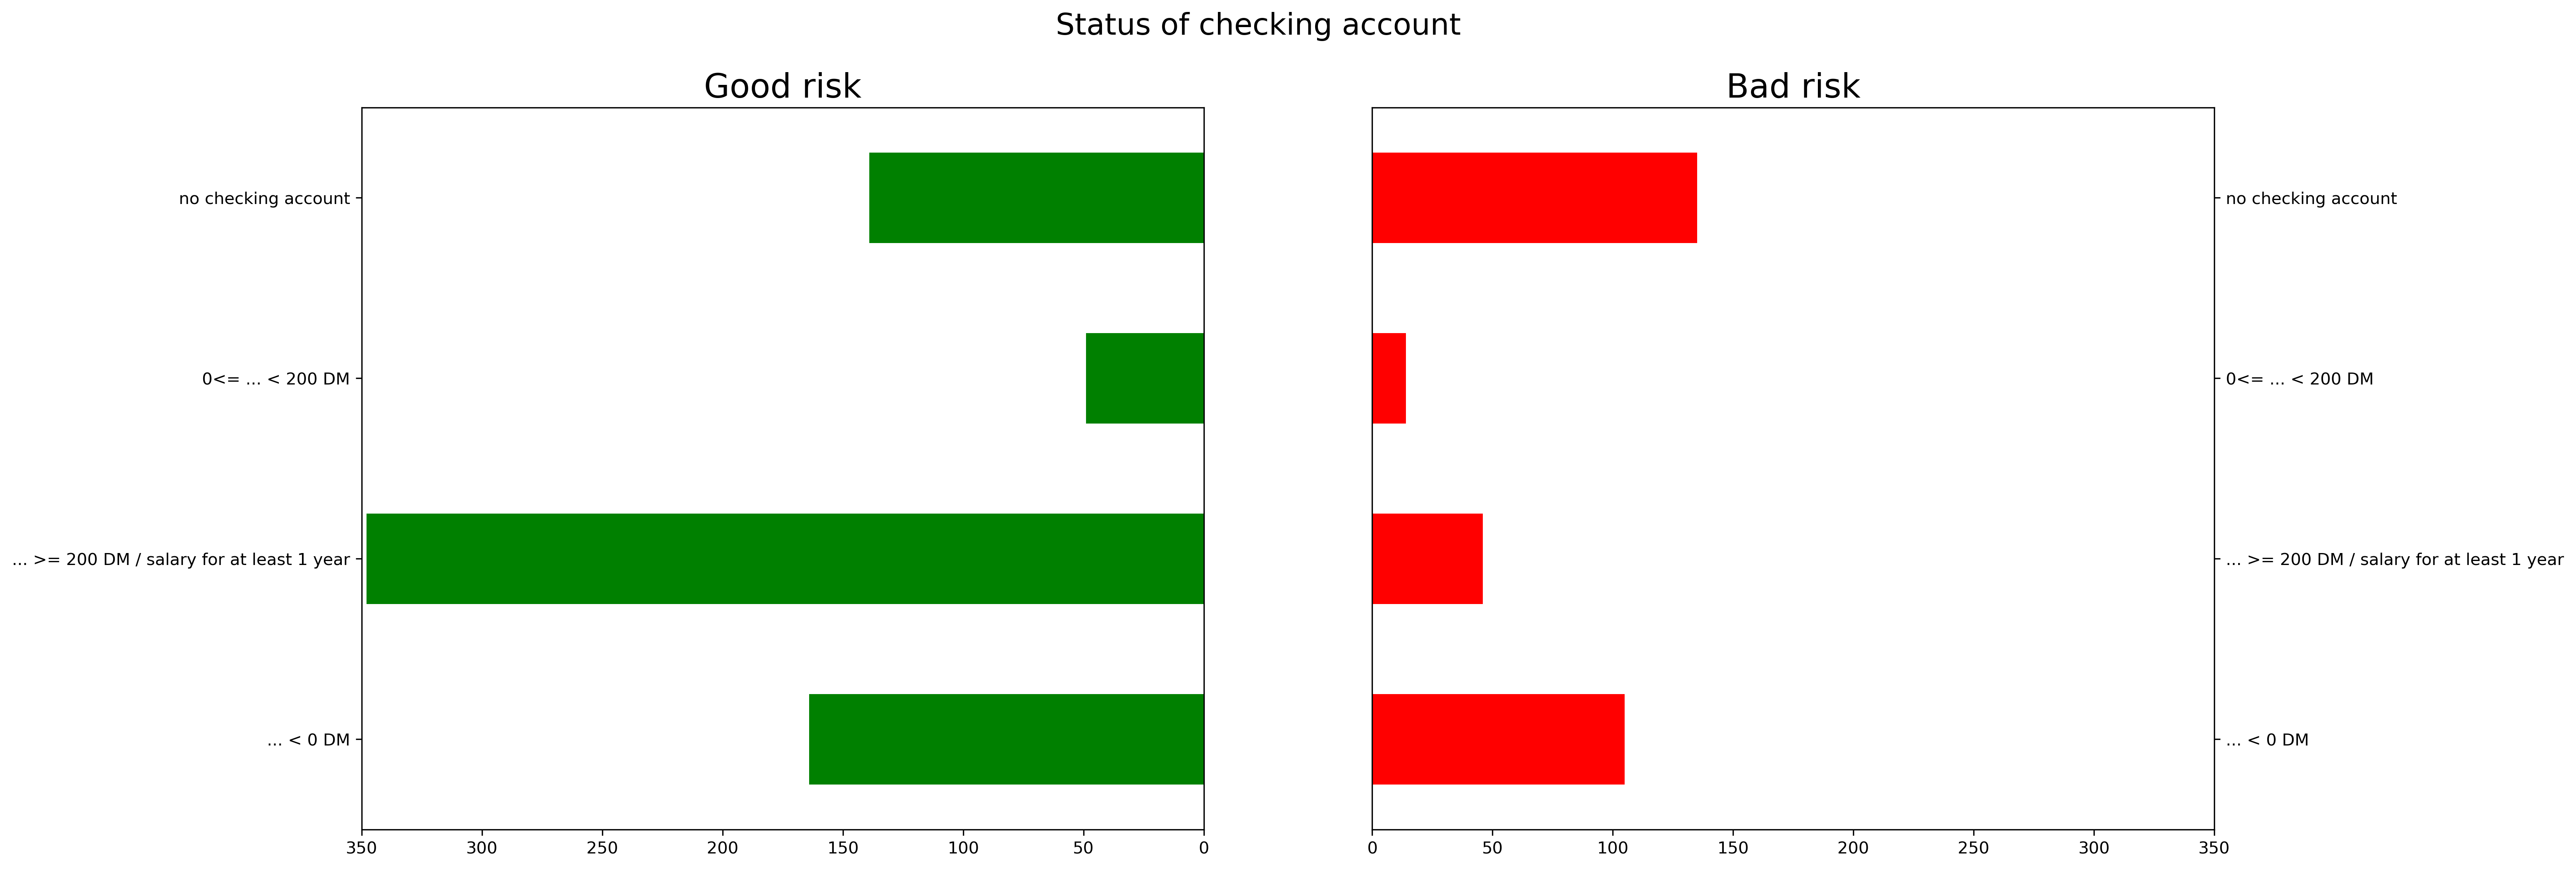

In [9]:
plt.figure(figsize=(20, 8), dpi=300)
plt.suptitle('Status of checking account', fontsize = 18)
plt.subplot(1,2,1)
plt.title('Good risk', fontsize = 20)
data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count().plot(color = 'green', kind = 'barh')
plt.xlim([350,0])
plt.ylabel('')

plt.subplot(1,2,2)
plt.title('Bad risk', fontsize=20)
data[data['credit_risk'] == 'bad'].groupby('status')['credit_risk'].count().plot(color = 'red',kind = 'barh')
plt.xlim([0,350])
plt.gca().yaxis.tick_right()
plt.ylabel('')
plt.show()

### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

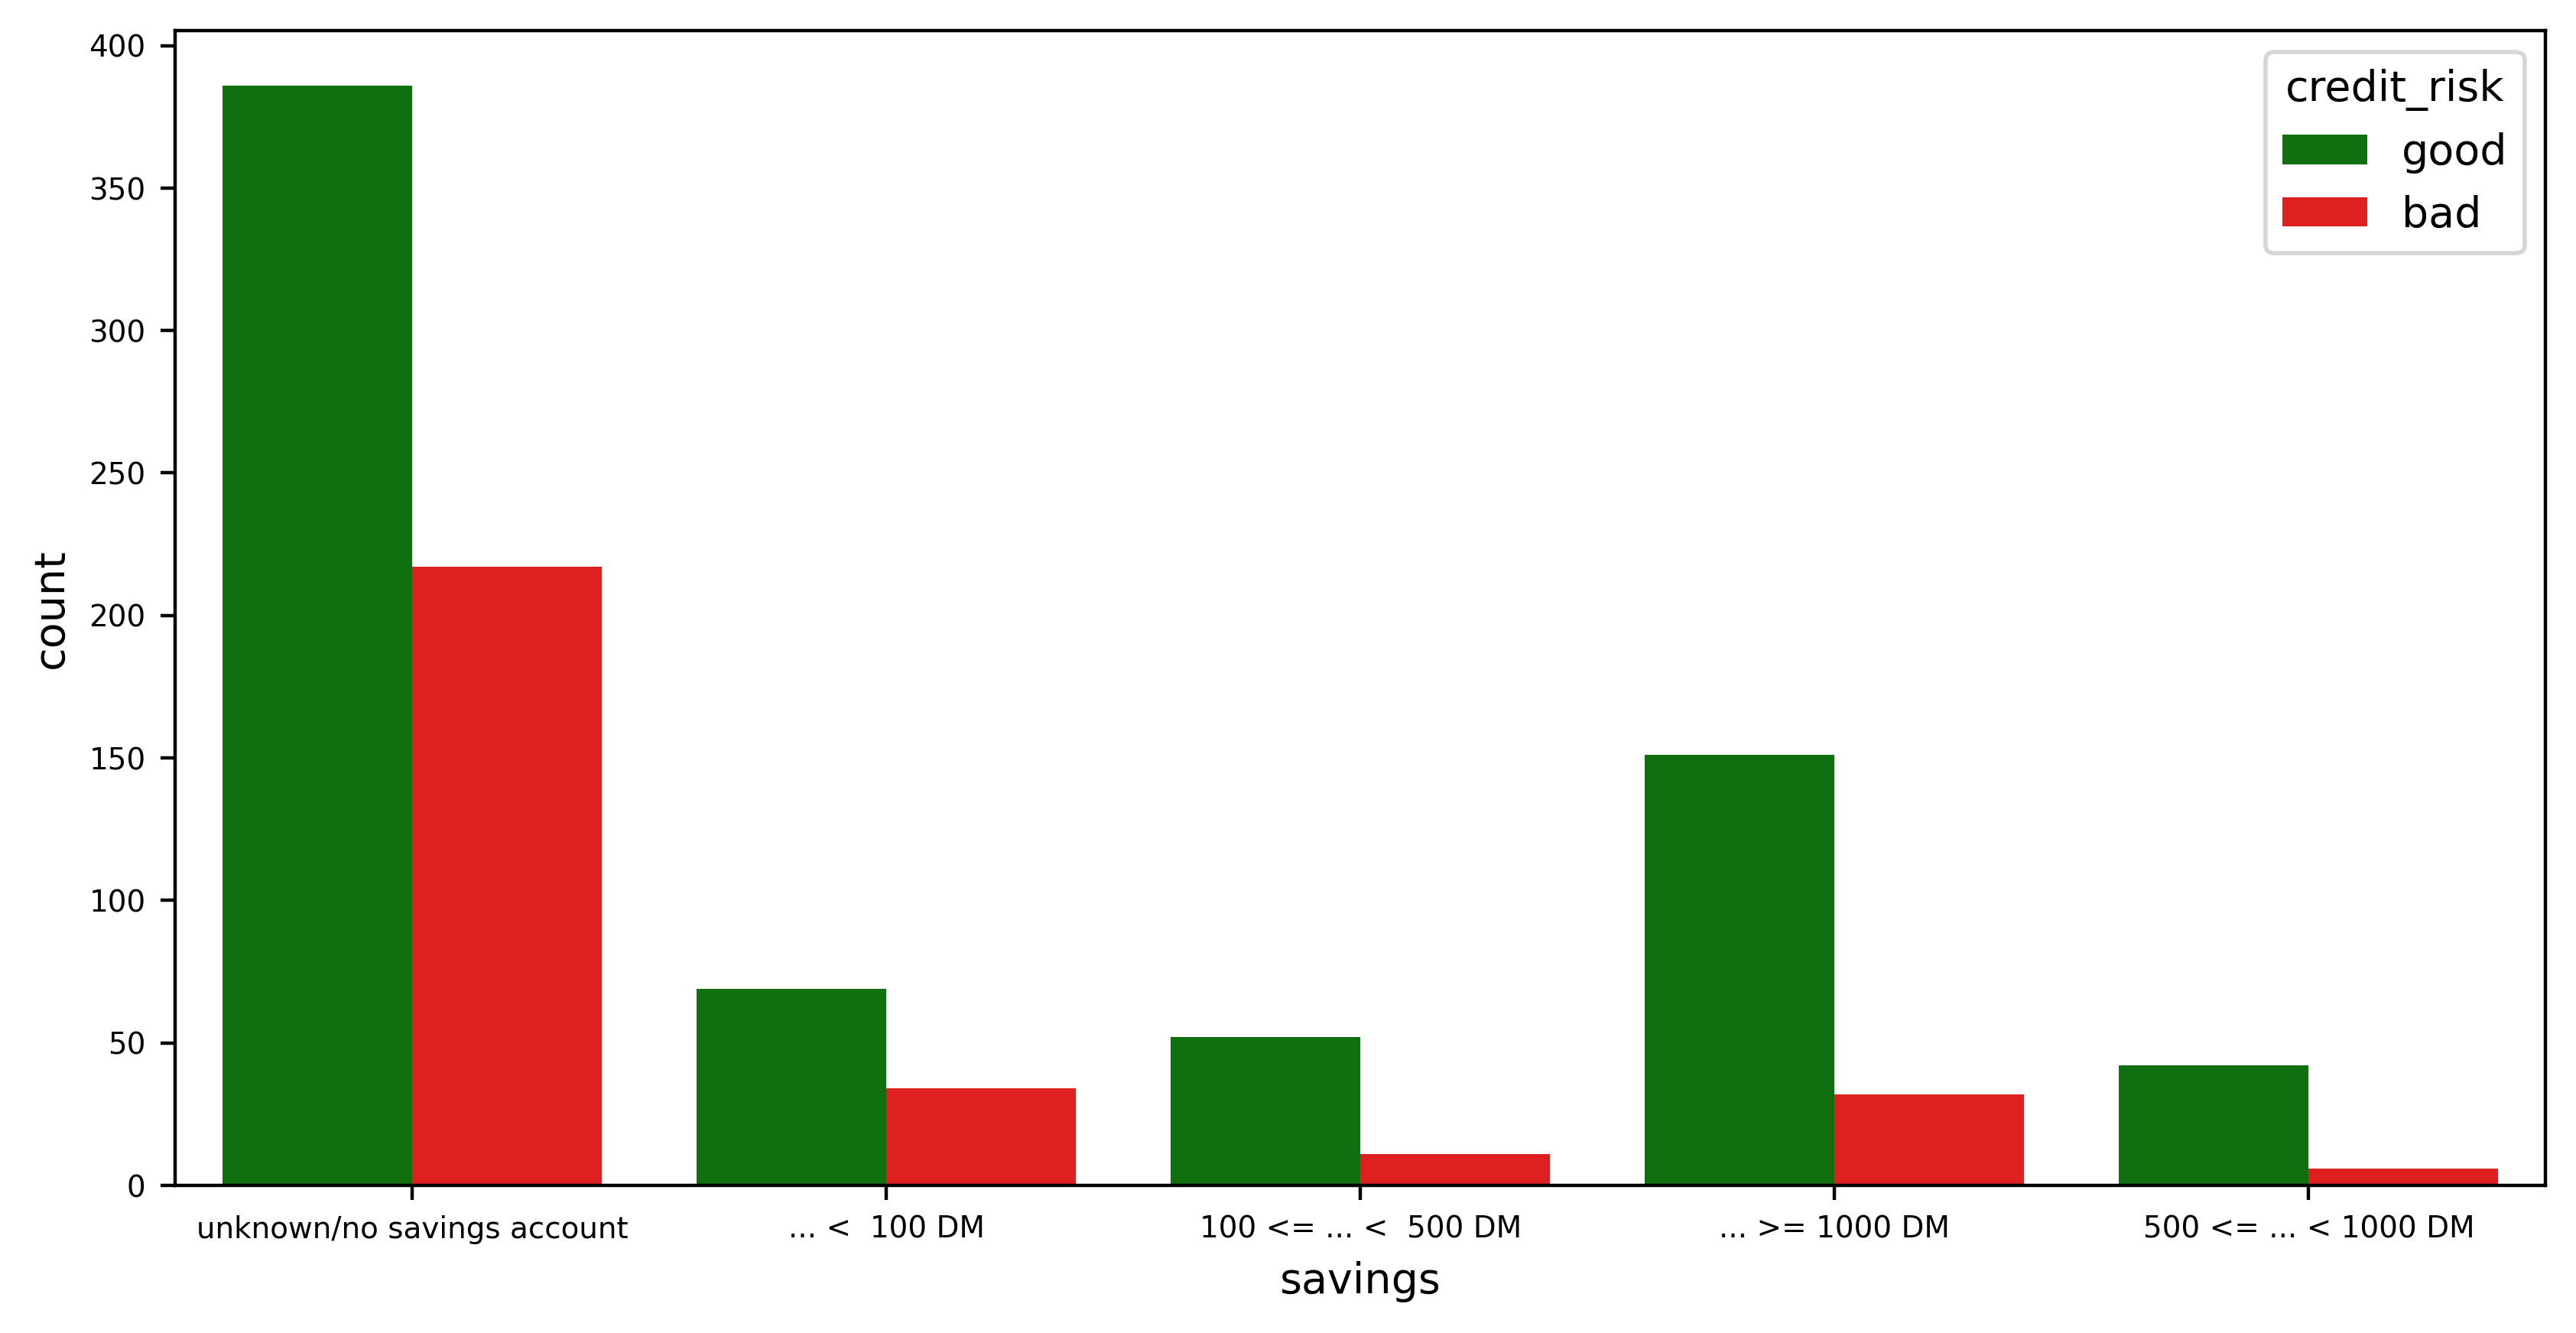

In [11]:
# your code here
plt.figure(figsize=(10, 5), dpi=400)
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7)
sns.countplot(data=data, x = 'savings', hue = 'credit_risk', palette = ['g','r'])
plt.show()


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

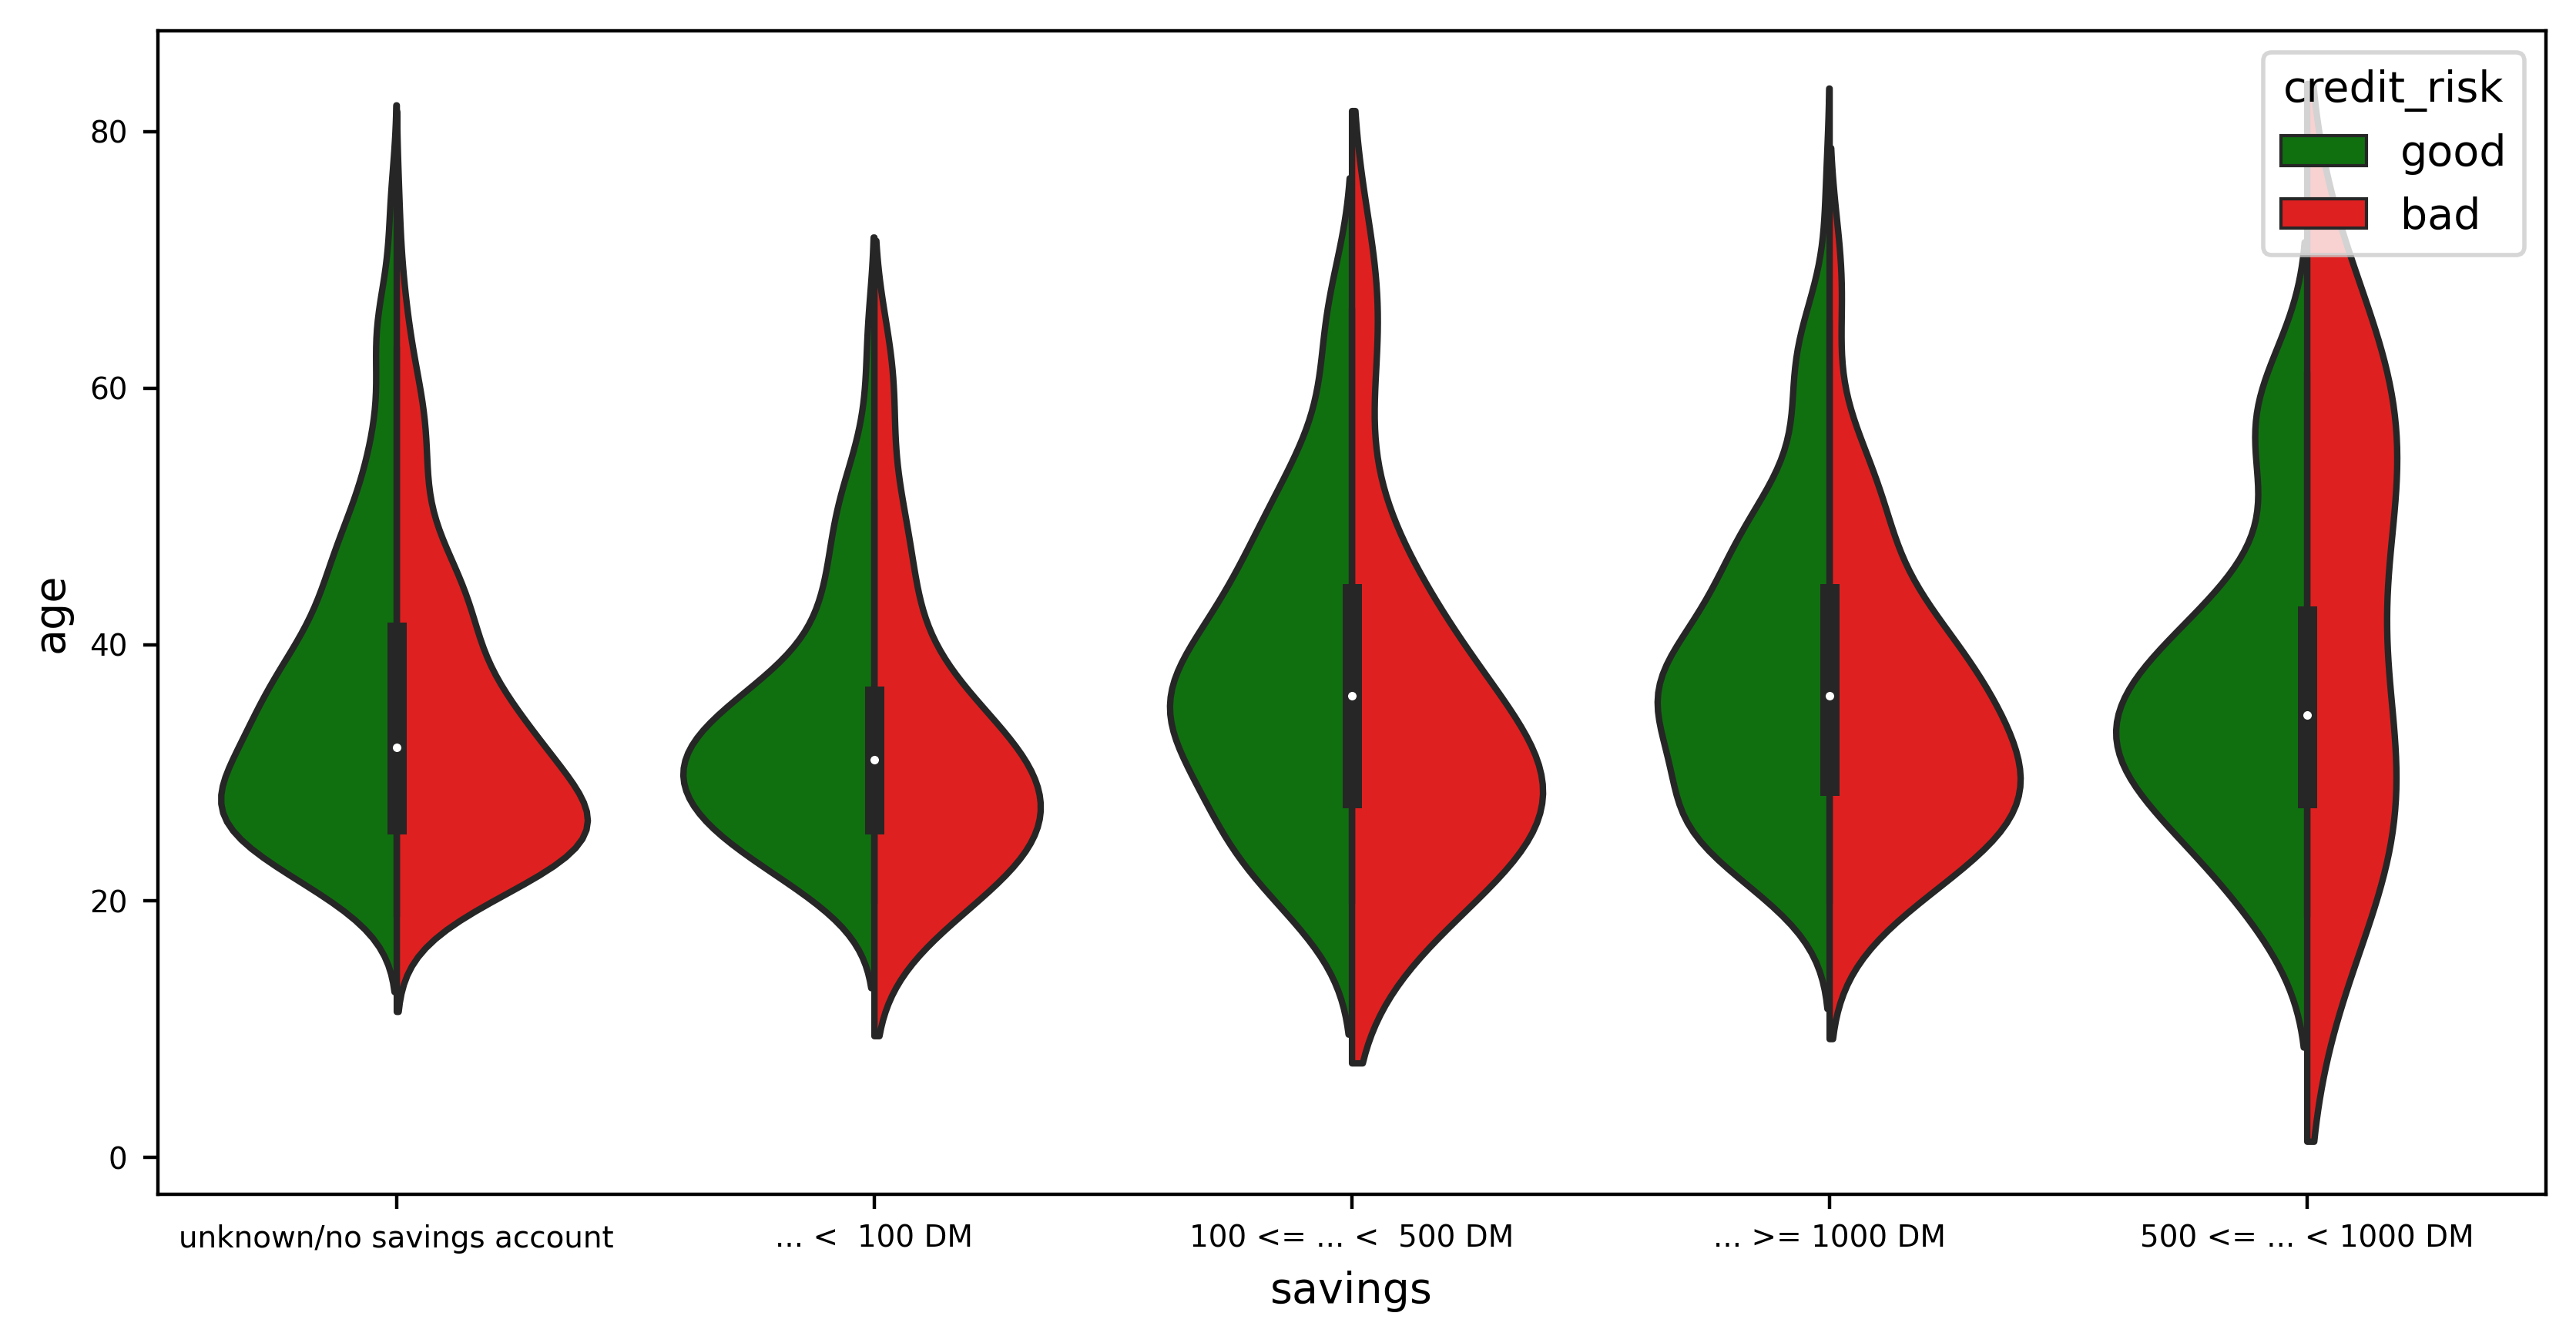

In [12]:
# your code here
plt.figure(figsize=(10, 5), dpi=400)
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7)
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', palette=['g', 'r'], split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

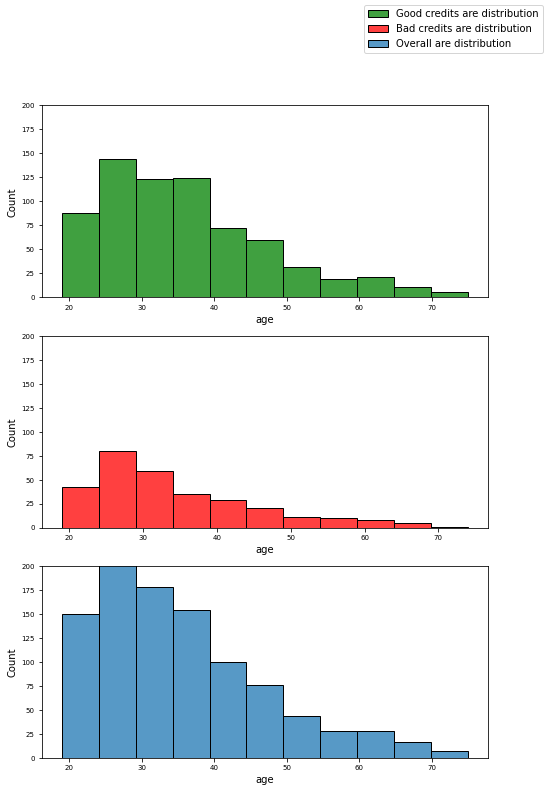

In [13]:
# your code here
fig, axs = plt.subplots(nrows= 3 , ncols= 1, figsize = (8, 12), sharey=True)
plt.ylim(0, 200)
sns.histplot(data = data[data['credit_risk'] == 'good'], x = 'age', ax = axs[0], label = 'Good credits are distribution', color = 'green', bins=11)
sns.histplot(data = data[data['credit_risk'] == 'bad'], x = 'age', ax = axs[1], label = 'Bad credits are distribution', color = 'red',bins=11)
sns.histplot(data = data, x = 'age', ax = axs[2], label = 'Overall are distribution', bins=11)
fig.legend(loc='upper right')
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

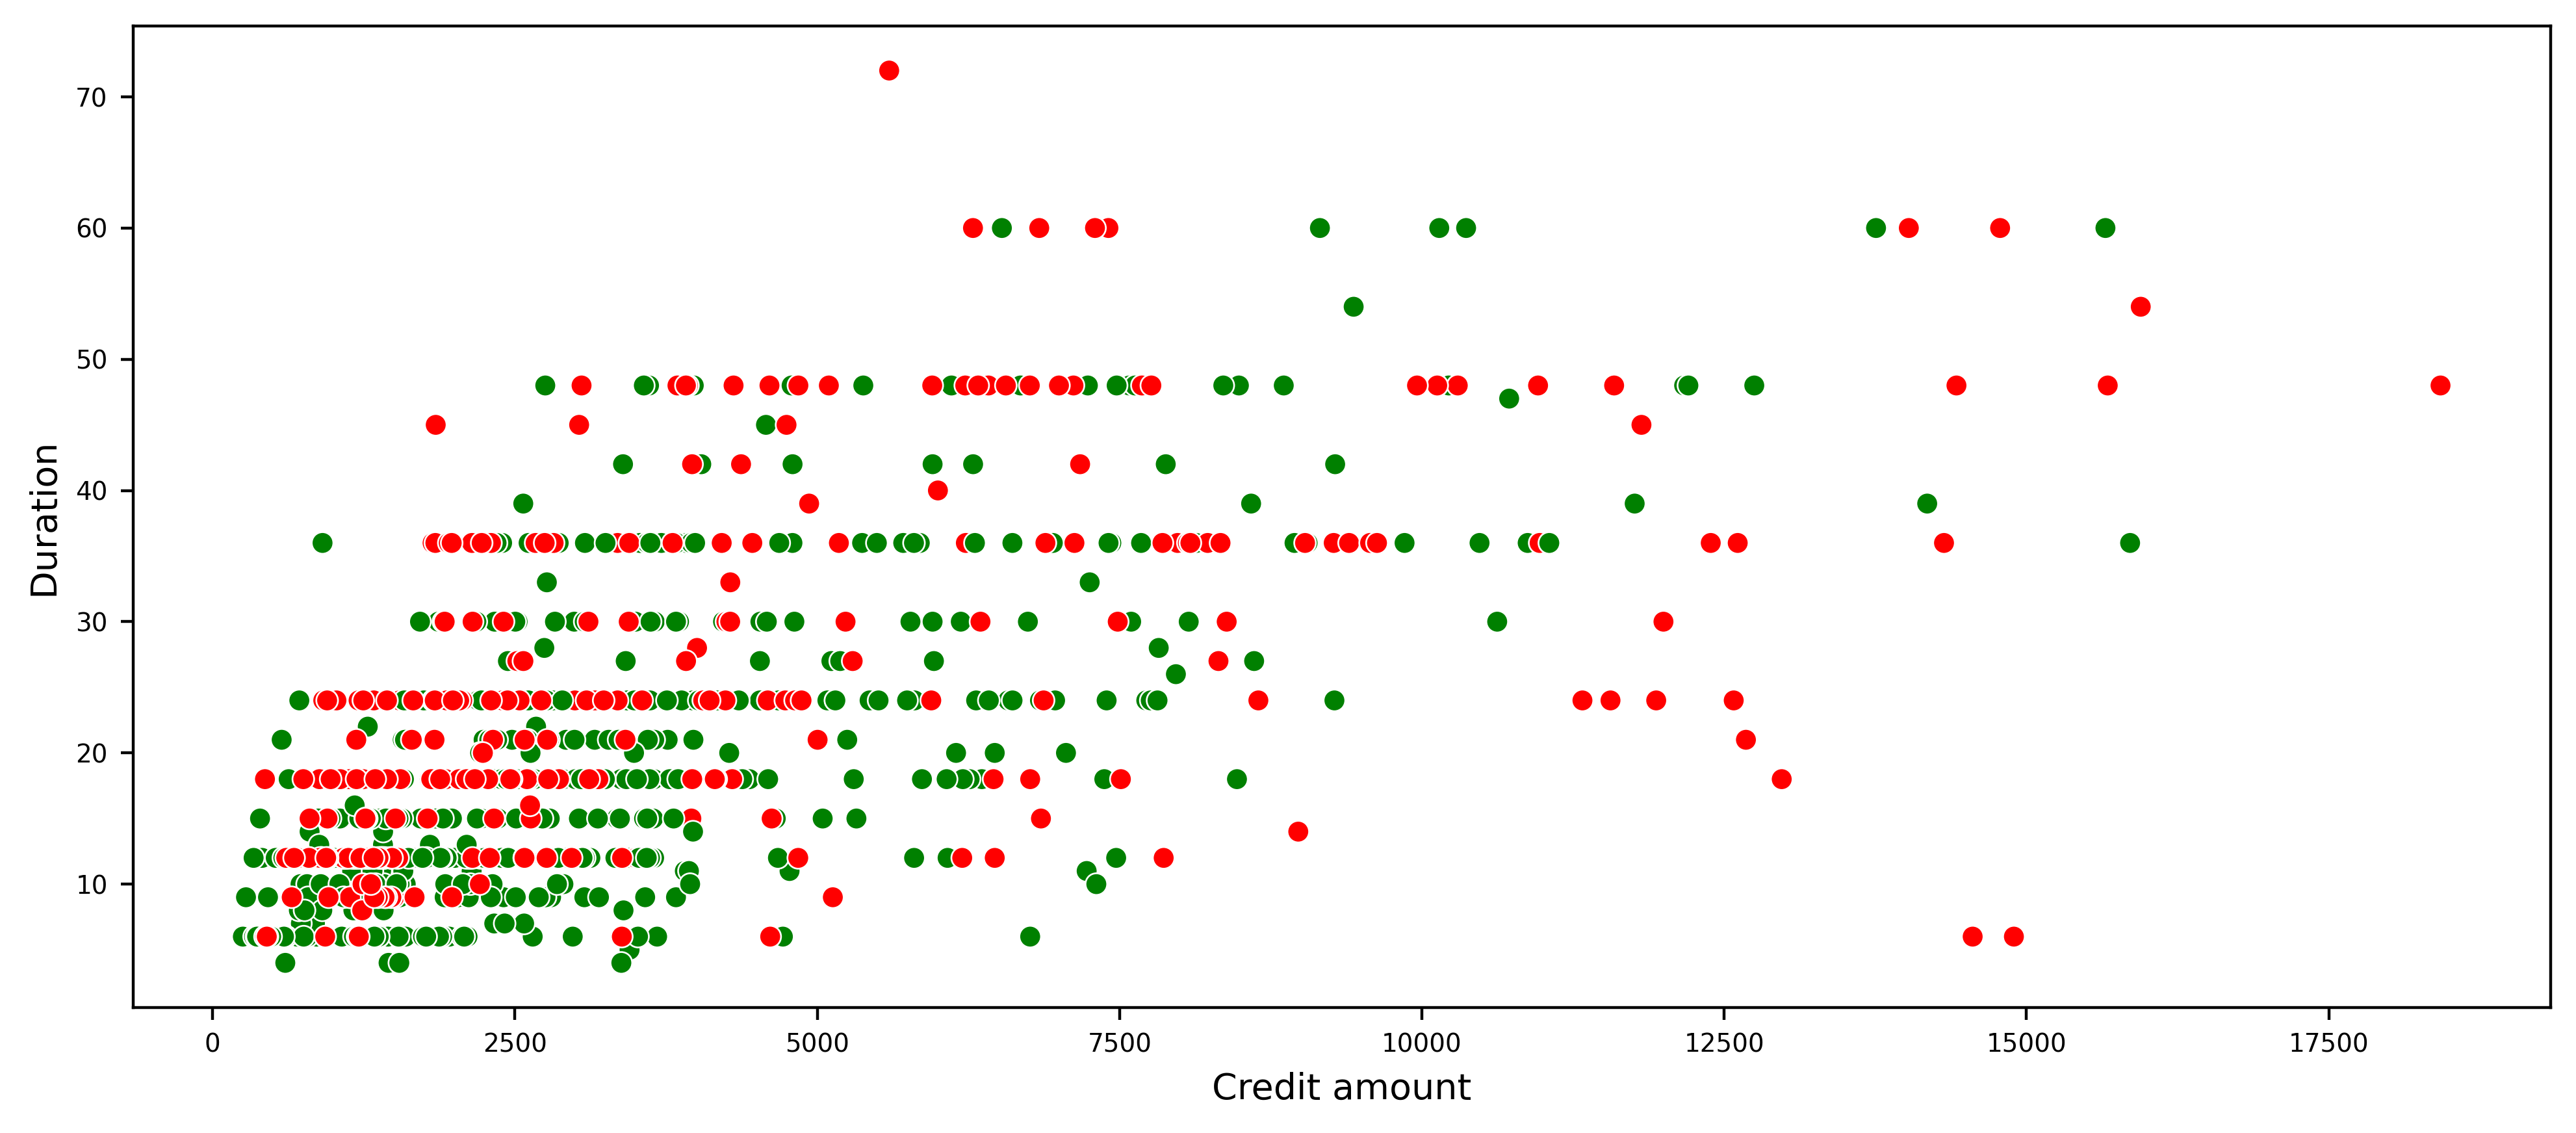

In [14]:
# your code here
plt.figure(figsize=(12, 5), dpi=400)
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
sns.scatterplot(data=data, x = 'amount',y='duration', hue='credit_risk', palette=['g','r'], legend=False)
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

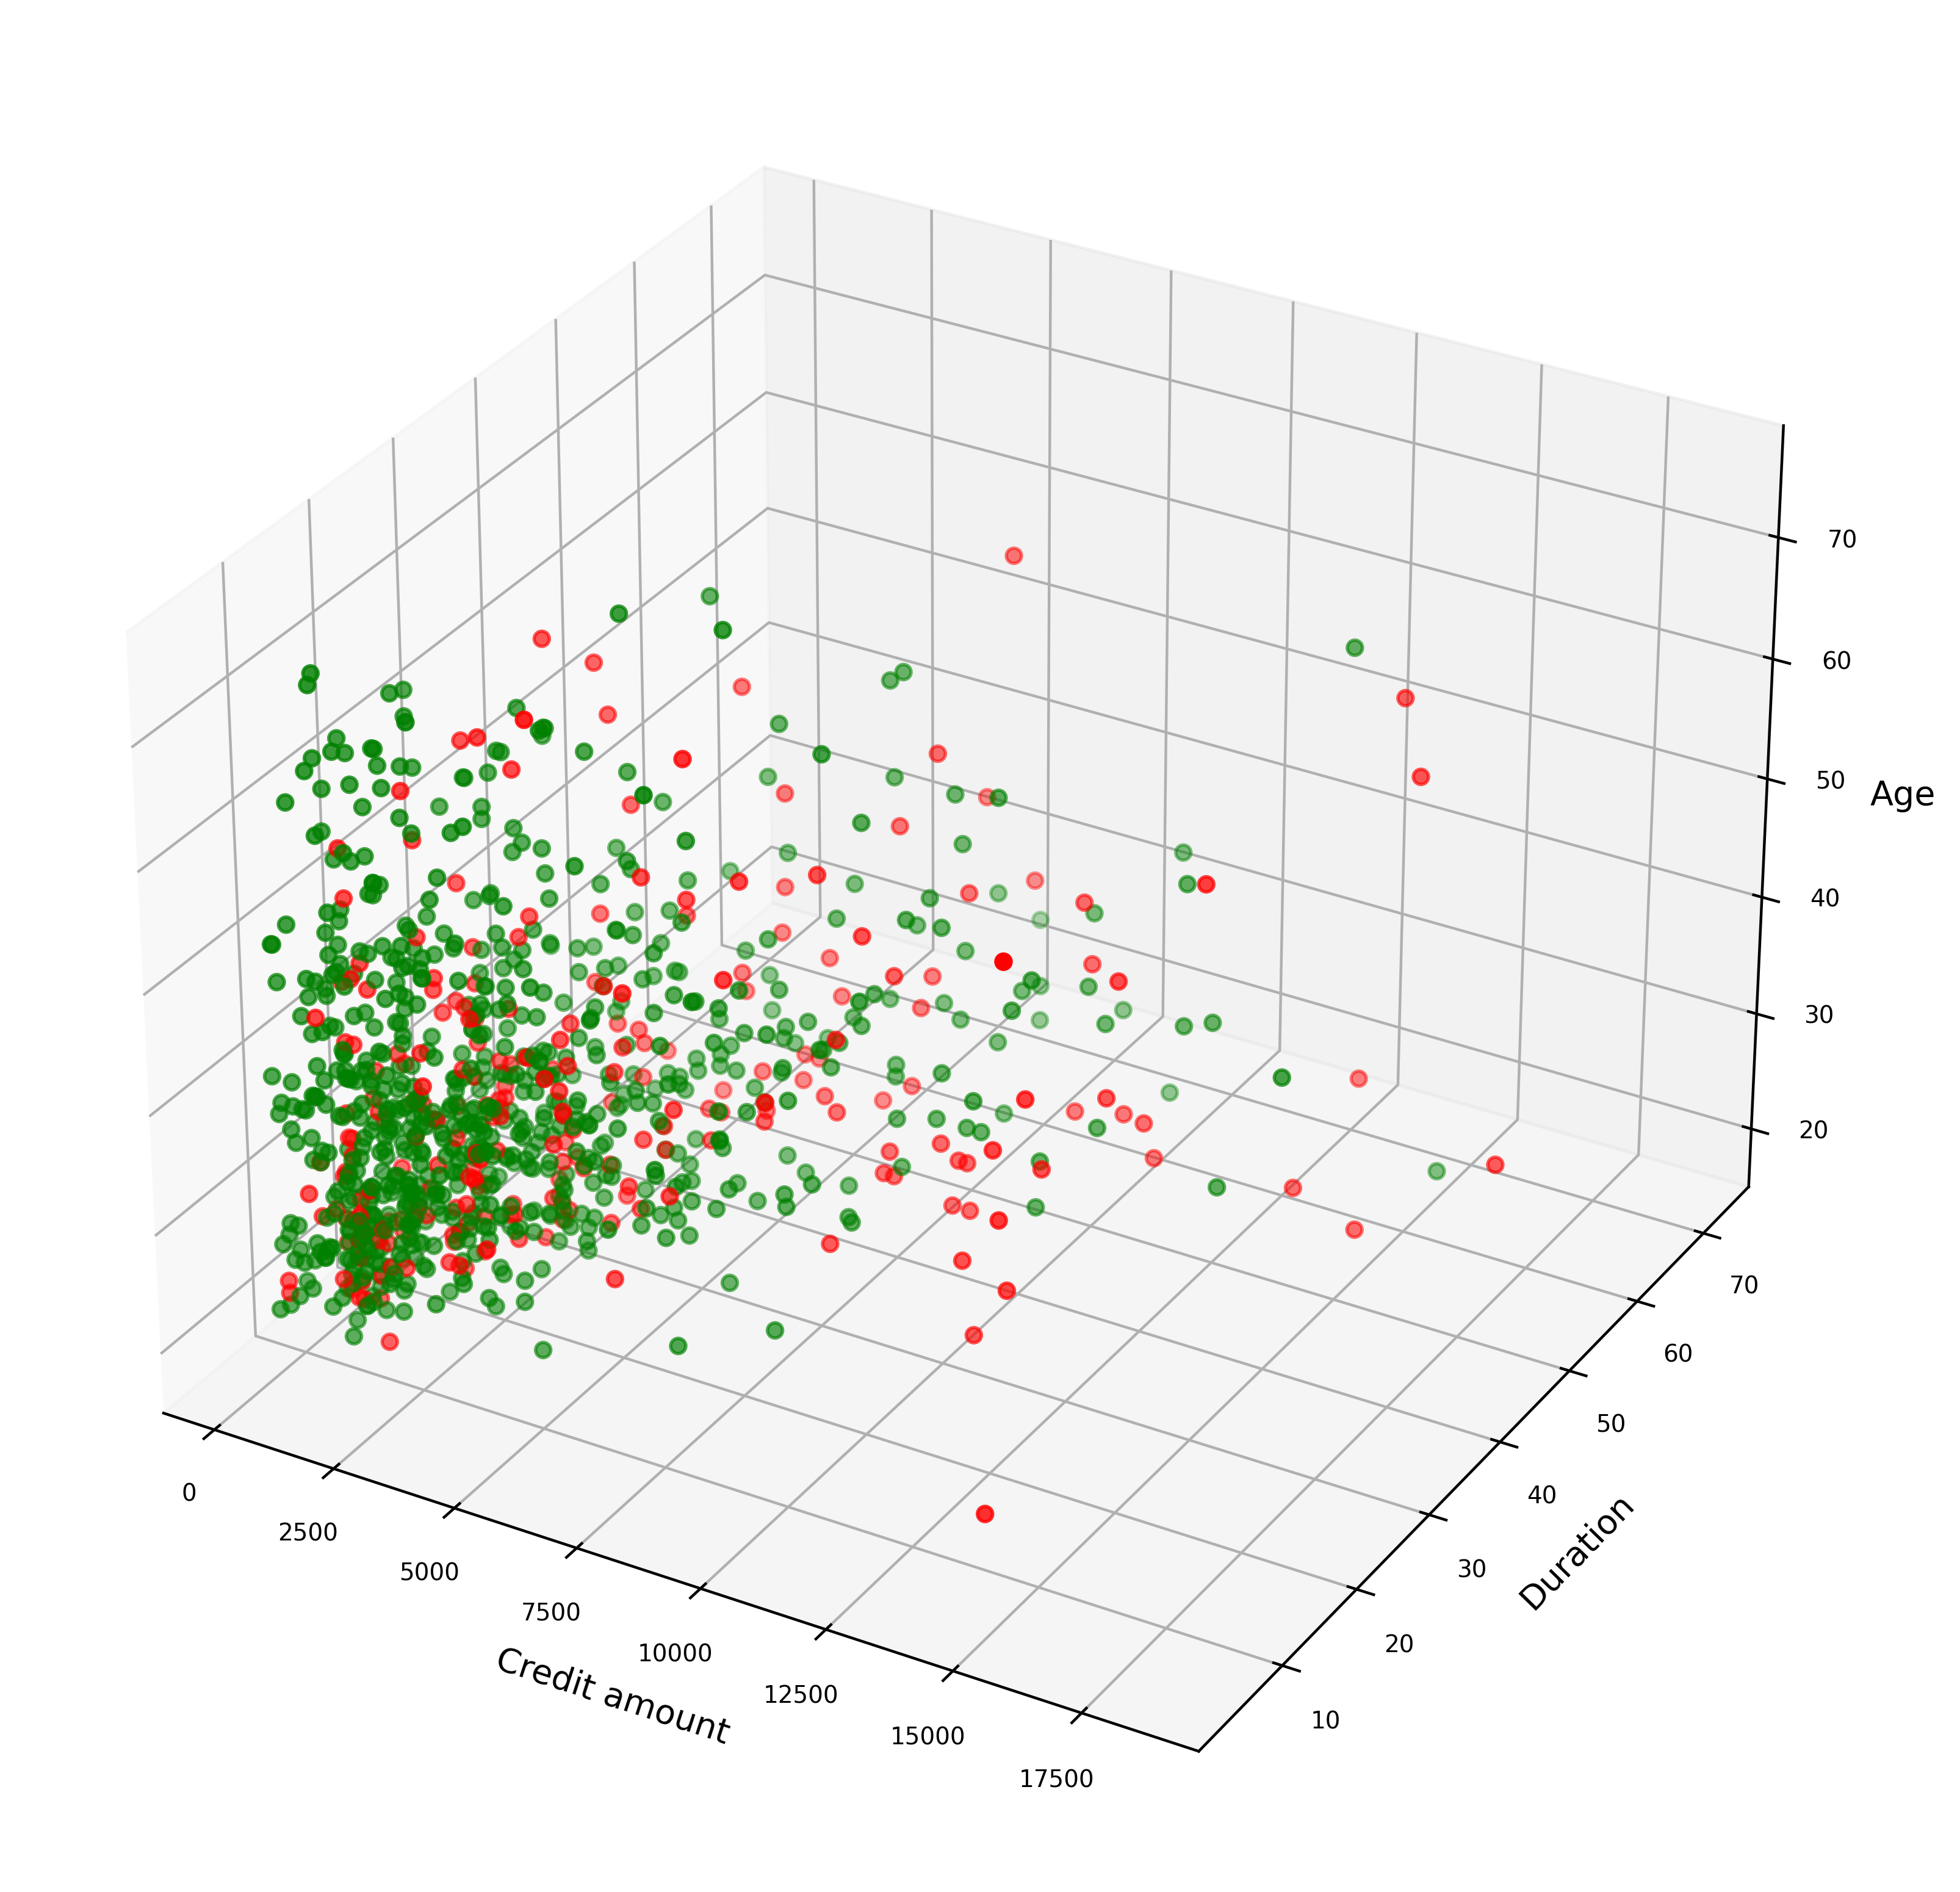

In [15]:
# your code here
plt.figure(figsize=(10, 10), dpi=400)
seaborn_plot = plt.axes (projection='3d')
plot1 = data[['amount']]
plot2 = data[['duration']]
plot3 = data[['age']]
colors = []
for i in range(750):
    colors.append('green')
for i in range(250):
    colors.append('red')
seaborn_plot.scatter3D(plot1, plot2, plot3, c = colors)
seaborn_plot.set_xlabel('Credit amount')
seaborn_plot.set_ylabel('Duration')
seaborn_plot.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [64]:
# your code here
data = pd.read_csv('german_credit.csv')
data = data.drop(columns = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'installment_rate'])
data['status'] = data['status'].replace(['no checking account', '... < 0 DM','0<= ... < 200 DM','... >= 200 DM / salary for at least 1 year'],['0','1','2','3'])
data['savings'] = data['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'],np.arange(5))
data['employment_duration'] = data['employment_duration'].replace(['unemployed','< 1 yr','1 <= ... < 4 yrs','4 <= ... < 7 yrs','>= 7 yrs'],np.arange(5))
data['present_residence'] = data['present_residence'].replace(['< 1 yr','1 <= ... < 4 yrs','4 <= ... < 7 yrs','>= 7 yrs'],np.arange(4))
data['housing'] = data['housing'].replace(['for free','rent'],['0','1'])
data['number_credits'] = data['number_credits'].replace(['1','1-2','2-3','4-5'],np.arange(4))
data['job'] = data['job'].replace(['unemployed/unskilled - non-resident','unskilled - resident','skilled employee/official','manager/self-empl./highly qualif. employee'],['0','1','2','3'])
data['people_liable'] = data['people_liable'].replace(['0 to 2','3 or more'],['0','1'])
data['telephone'] = data['telephone'].replace(['no','yes (under customer name)'],['0','1'])
data['foreign_worker'] = data['foreign_worker'].replace(['no','yes'],['0','1'])
data['credit_risk'] = data['credit_risk'].replace(['bad','good'],['0','1'])
data.head(50)

,status,duration,amount,savings,employment_duration,present_residence,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,3,21,0,0,2,0,0,0,1
1,0,9,2799,0,2,1,36,0,2,2,1,0,0,1
2,1,12,841,1,3,3,23,0,0,1,0,0,0,1
3,0,12,2122,0,2,1,39,0,2,1,1,0,1,1
4,0,12,2171,0,2,3,38,1,2,1,0,0,1,1
5,0,10,2241,0,1,2,48,0,2,1,1,0,1,1
6,0,8,3398,0,3,3,39,1,2,1,0,0,1,1
7,0,6,1361,0,1,3,40,1,0,1,1,0,1,1
8,3,18,1098,0,0,3,65,1,2,0,0,0,0,1
9,1,24,3758,2,0,3,23,0,0,0,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [17]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))